Instalamos el paquete "missingno" que nos ayuda a crear un gráfico donde ver de forma visual los datos faltantes en nuestro dataset



In [ ]:
# Instalación silenciosa de missingno
# (No muestra output)
%%capture
# Muestra error con el capture si sale mal la instalacion
!pip install missingno

Importamos las librerias necesarias para realizar nuestro procesamiento y limpieza de datos

In [ ]:
#Importamos las librerias esenciales

import pandas as pd # para manejo de datos
import numpy as np # para operaciones numericas
import plotly as pl # para visualizaciones interactivas
import seaborn as sns # para graficos estadisticos
import missingno as msno # para visualizar datos faltantes

# Cargamos el dataset de kiva_loans.csv para trabajar

*   Elemento de lista
*   Elemento de lista

In [ ]:
# Cargamos nuestro dataset principal

df = pd.read_csv("kiva_loans.csv")

In [ ]:
# Aseguramos que sea DataFrame

df = pd.DataFrame(df)

In [ ]:
# Echamos un vistazo a las primeras 20 filas

df.head(20)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [ ]:
# Echamos un vistazo a las primeras 20 filas

df.shape

(671205, 20)

In [ ]:

# Información general del dataset
# Tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [ ]:
# Contamos los valores no nulos por columna

df.count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [ ]:
# Estadisticas descriptivas de las columnas numericas (int y float)
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [ ]:
# Buscamos duplicados

df.duplicated().sum()

np.int64(0)

# Hay valores nulos?

In [ ]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum(). sort_values(ascending=False)
#Suma la cantidad de valores nulos por cada columna

,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


# Son más del 25%?

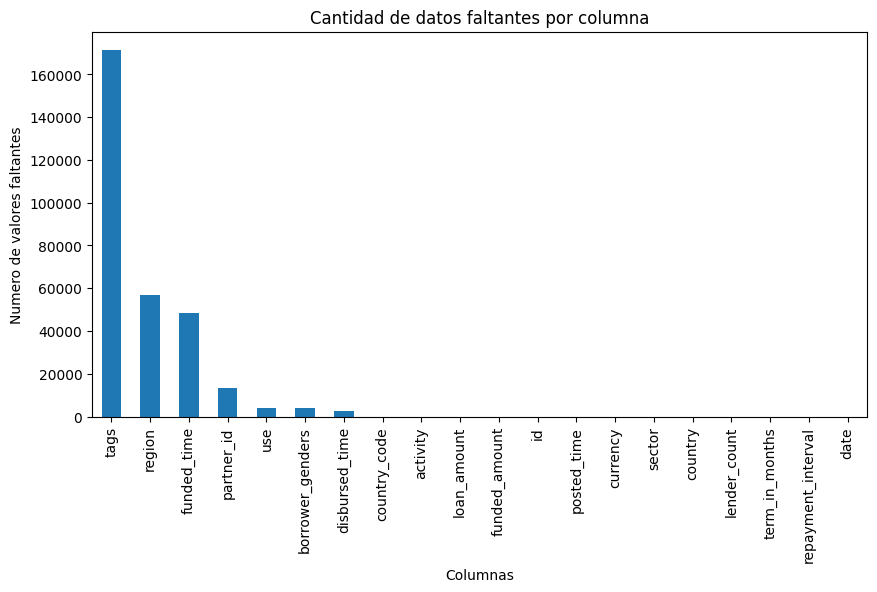

In [ ]:
import matplotlib.pyplot as plt

# Calcular % de nulos
missing = df.isna(). sum(). sort_values(ascending=False)

plt.figure(figsize=(10, 5))
missing.plot(kind="bar")
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel ("Numero de valores faltantes")
plt.xlabel("Columnas")
plt.show()

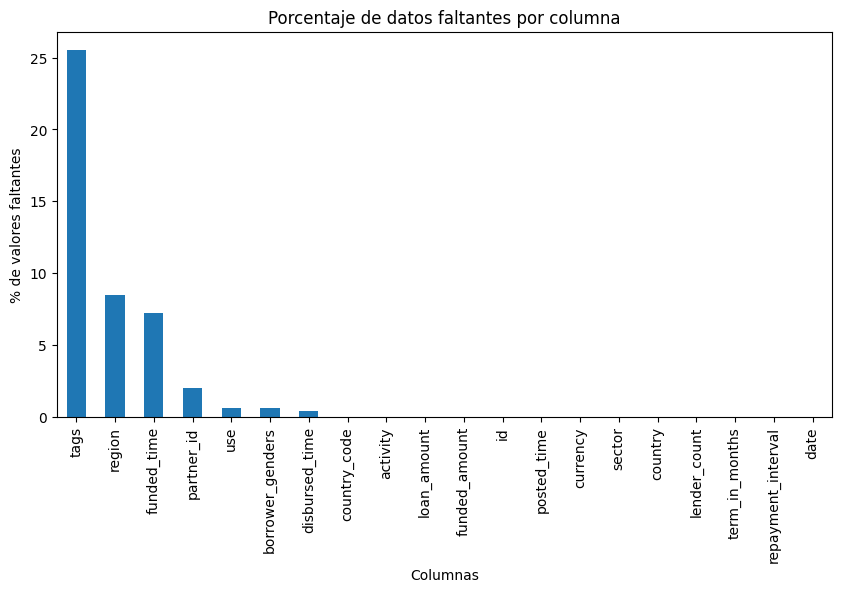

In [ ]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
#Porcentaje de mayor a menor de datos nulos

plt.figure(figsize=(10, 5))
missing_pct.plot(kind="bar")
plt.title("Porcentaje de datos faltantes por columna")
plt.ylabel ("% de valores faltantes")
plt.xlabel("Columnas")
plt.show()

# La columna tags tiene muchos valores faltantes, debería borrarla porque no aporta información de valor

<Axes: >

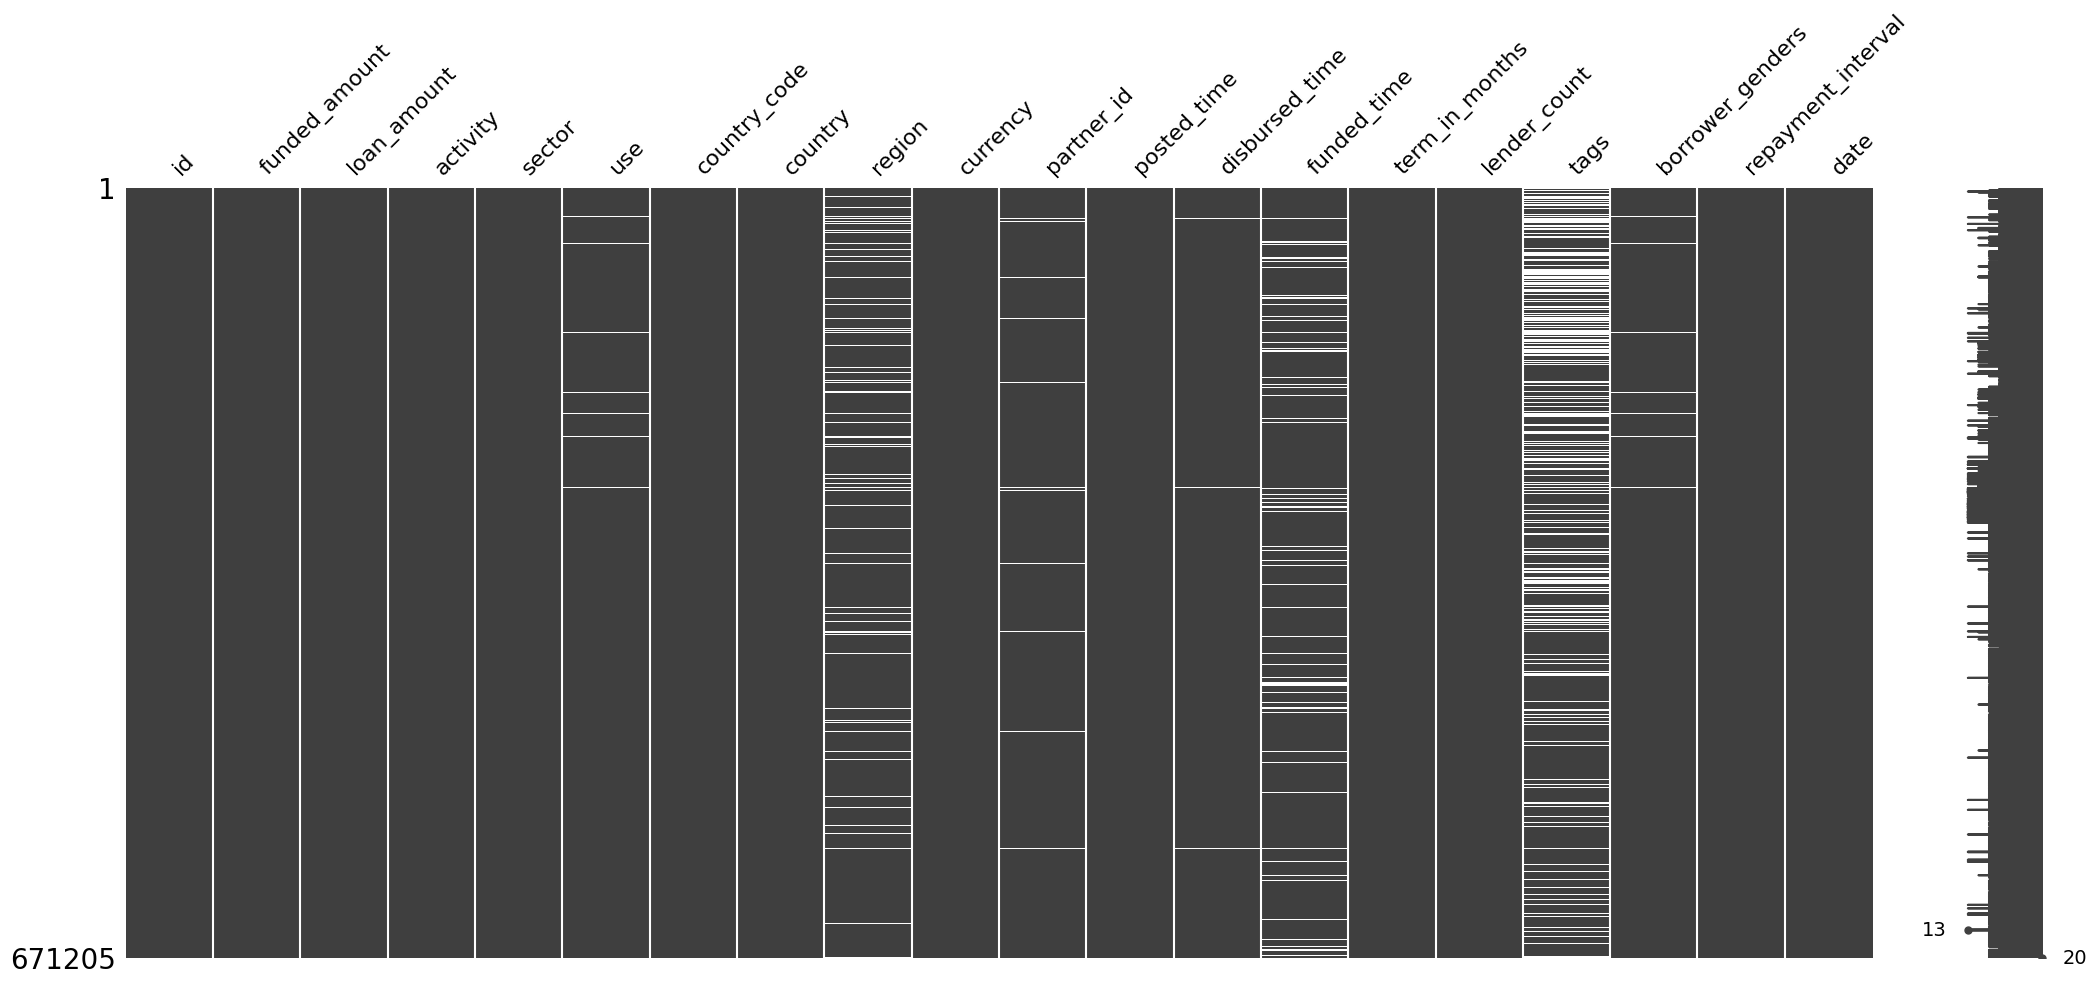

In [ ]:
msno.matrix(df)

<Axes: >

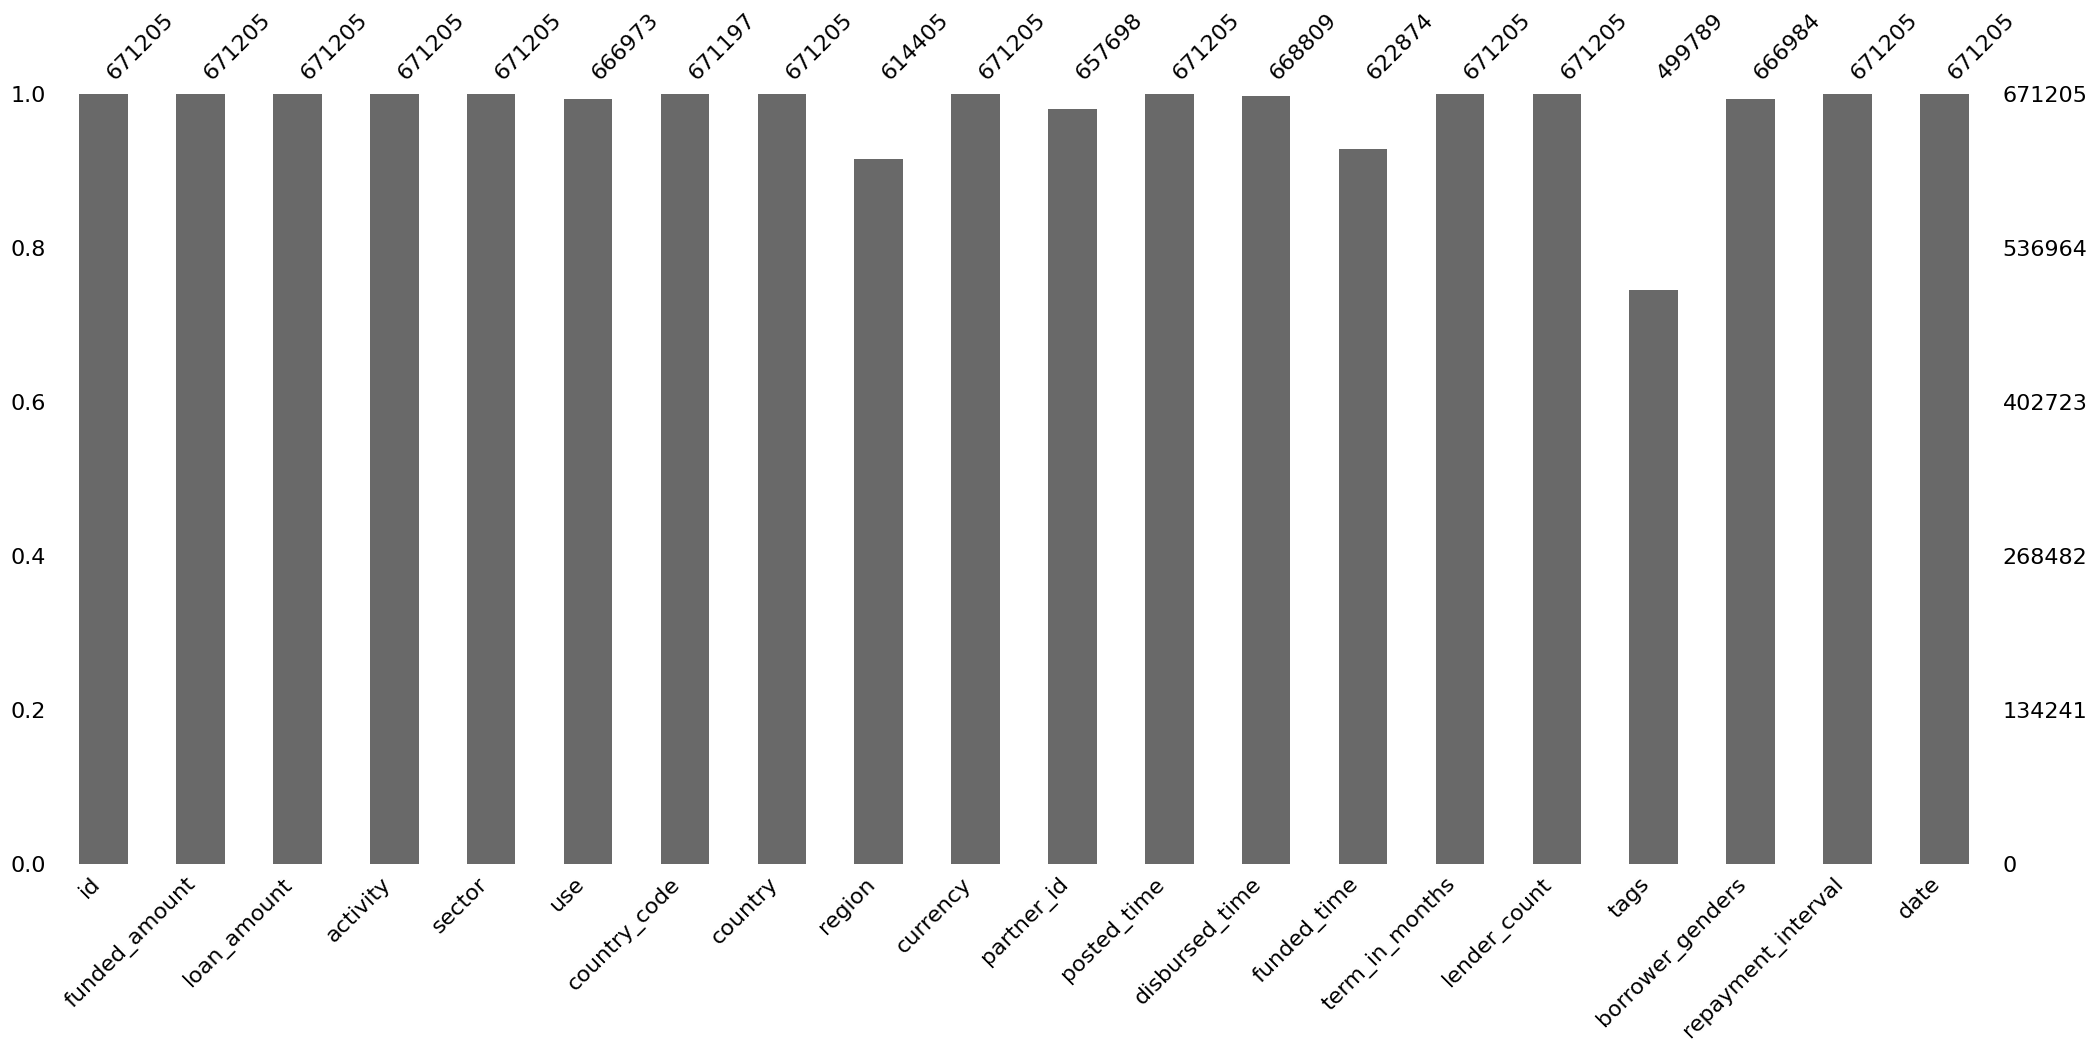

In [ ]:
msno.bar(df)

In [ ]:
kiva_loands_df = df.copy()

# Borraremos las columnas que no nos aportan mucha información o información de valor, en este caso borraremos las columnas parthner_id, country_code, tags

In [ ]:
# cargar desde google drive from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/datasets/kiva_loans.csv')

In [ ]:
'''
Borramos 'country_code' porque es redundante ya que hay una columna 'country',
Borramos 'tags' porque al tener tantos valores faltantes no nos aporta información de valor,
Borramos 'partnet_id' porque no es una información que nos provea mucho valor,
Borramos 'borrower_genders' porque no es una información que nos provea mucho valor,
Borramos 'date' porque la columna 'posted_time' ya nos devuelve el mismo valor,
'''
cols_to_drop = ['country_code', 'tags', 'partner_id', 'borrower_genders', 'date', 'funded_time', 'region', 'use']
for col in cols_to_drop:
    # Check if the column exists in the DataFrame before dropping

    if col in kiva_loands_df.columns:
        kiva_loands_df = kiva_loands_df.drop(columns=col)


# Vemos que ahora tenemos 12 columnas y no 20

In [ ]:
kiva_loands_df.shape

(671205, 12)

In [ ]:
kiva_loands_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly


In [ ]:
kiva_loands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   currency            671205 non-null  object 
 7   posted_time         671205 non-null  object 
 8   disbursed_time      668809 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 61.5+ MB


In [ ]:
# Convertir a datetime las fechas
kiva_loands_df["posted_time"] = pd.to_datetime(kiva_loands_df["posted_time"], errors="coerce")
kiva_loands_df["disbursed_time"] = pd.to_datetime(kiva_loands_df["disbursed_time"], errors="coerce")
# Normalizar a la fecha (eliminar la hora, estableciendola en medianoche) manteniendo el tipo de datos
kiva_loands_df["posted_time"] = kiva_loands_df["posted_time"].dt.normalize()
kiva_loands_df["disbursed_time"] = kiva_loands_df["disbursed_time"].dt.normalize()

# Tomamos las columnas de tipo de dato "object" y les definimos el tipo de dato "string"

In [ ]:
kiva_loands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   country             671205 non-null  object             
 6   currency            671205 non-null  object             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  object             
dtypes: datetime64[ns

In [ ]:
kiva_loands_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly


# Tomamos las columnas de tipo de dato "object" y les definimos el tipo de dato "string"

In [ ]:
for col in kiva_loands_df.columns:
  if kiva_loands_df[col].dtype == "object":
    kiva_loands_df[col] = kiva_loands_df[col].astype("string")

# Verificamos que haya cambiado el tipo de dato

In [ ]:
kiva_loands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
dtypes: datetime64[ns

# Nos aseguramos que los datos de tipo "str" no tengan espacos innecesarios y que estén escritas en minúscula

In [ ]:
def clean_text(s):
  return s.astype(str).str.strip().str.lower()


  for col in kiva_loands_df.columns:
    if kiva_loands_df[col].dtype == "string":
      kiva_loands_df[col] == clean_text(kiva_loands_df[col])

Creamos la columna loan_type para saber si un préstamo fue desembolsado antes o después de la fecha de publicación:
·"pre_disbursed": El préstamos se desembolsó antes de publicarse (disbursed_time < posted_time)
·"post_disbursed": el préstamos se desembolsó después de publicarse (disbursed_time >= posted_time)

In [ ]:
kiva_loands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
dtypes: datetime64[ns

In [ ]:
kiva_loands_df["loan_type"] = np.where(
    kiva_loands_df["disbursed_time"] < kiva_loands_df["posted_time"],
    "pre_disbursed",
    "post_disbursed"
)

In [ ]:
kiva_loands_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed


In [ ]:
post_disbursed_loands = kiva_loands_df[kiva_loands_df["loan_type"] == "post_disbursed"]

In [ ]:
post_disbursed_loands.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
5,1080148,250.0,250.0,Services,Services,Kenya,KES,2014-01-01 00:00:00+00:00,2014-01-30 00:00:00+00:00,4.0,6,irregular,post_disbursed
62,653290,4275.0,4275.0,Personal Housing Expenses,Housing,Vietnam,VND,2014-01-02 00:00:00+00:00,2014-01-27 00:00:00+00:00,14.0,144,bullet,post_disbursed
67,1080150,125.0,125.0,Energy,Services,Kenya,KES,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,6,irregular,post_disbursed
99,1080153,5000.0,5000.0,Food Production/Sales,Food,United States,USD,2014-01-02 00:00:00+00:00,2014-03-10 00:00:00+00:00,30.0,261,monthly,post_disbursed
114,1080151,125.0,125.0,Energy,Services,Kenya,KES,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,7,irregular,post_disbursed


Creamos una nueva columna 'loan_amount' para clasifica si el prestamo es pequeño, mediano o grande

In [ ]:
# Obtener min y max reales
min_val = kiva_loands_df["loan_amount"].min()
max_val = kiva_loands_df["loan_amount"].max()
# Definir limites segun los rangos

bins = [
    min_val,     #Minimo Real
    500,
    2500,
    10000,
    max_val      #Maximo Real
]

labels = ["micro", "small", "medium", "large"]

kiva_loands_df["loan_amount_category"] = pd.cut(kiva_loands_df["loan_amount"], bins=bins, labels=labels, right=False)

# Ver resumen
print(kiva_loands_df["loan_amount_category"].value_counts())
print("Min", min_val, "Max:", max_val)




loan_amount_category
micro     330534
small     299111
medium     40144
large       1415
Name: count, dtype: int64
Min 25.0 Max: 100000.0


# Visualicemos la información que hemos limpiado

#Histograma:

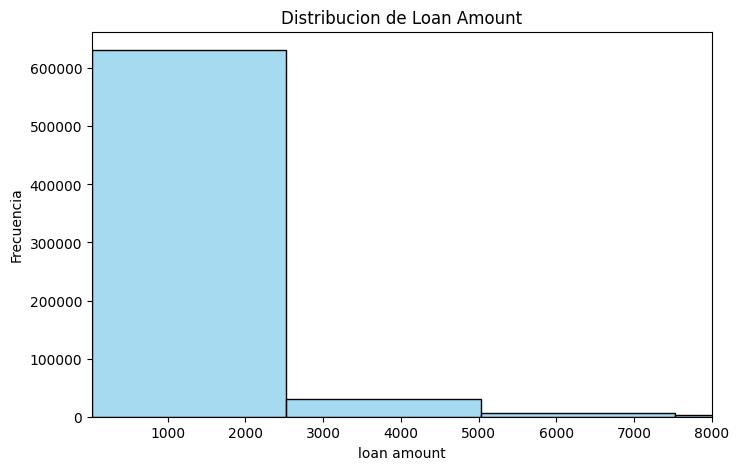

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(kiva_loands_df["loan_amount"], bins=40, kde=False, color="skyblue")
plt.title("Distribucion de Loan Amount")
plt.xlabel("loan amount")
plt.ylabel("Frecuencia")
plt.xlim(25, 8000)
plt.show()


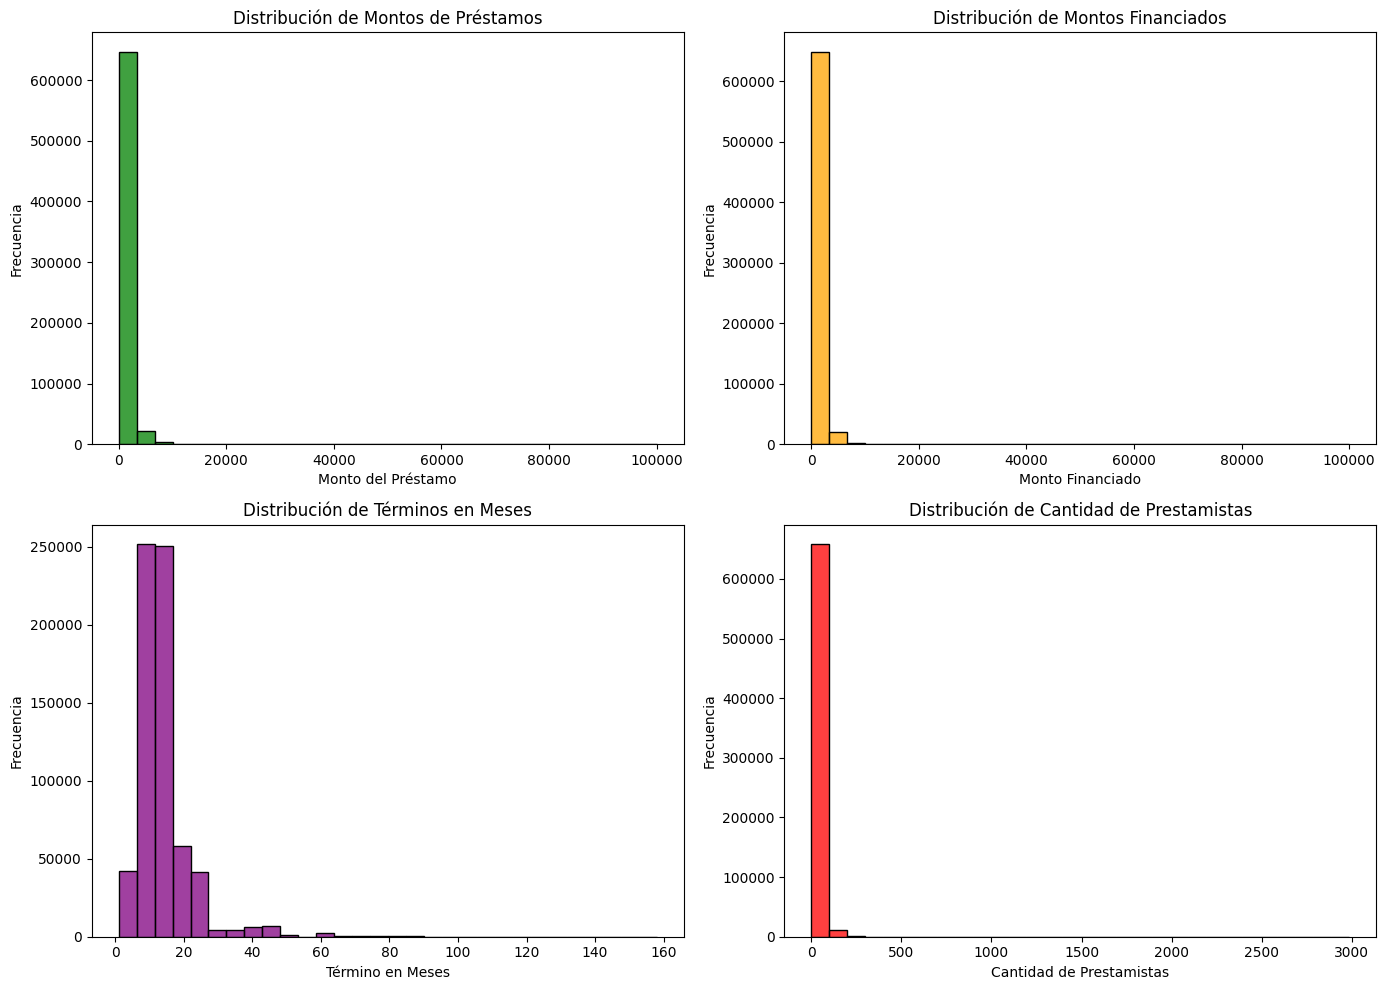

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()
#Load Amount
sns.histplot(df['loan_amount'],bins=30,kde=False,color='green',ax=axes[0])
axes[0].set_title('Distribución de Montos de Préstamos')
axes[0].set_xlabel('Monto del Préstamo')
axes[0].set_ylabel('Frecuencia')
#Funded Amount
sns.histplot(df['funded_amount'],bins=30,kde=False,color='orange',ax=axes[1])
axes[1].set_title('Distribución de Montos Financiados')
axes[1].set_xlabel('Monto Financiado')
axes[1].set_ylabel('Frecuencia')
#Term in Months
sns.histplot(df['term_in_months'],bins=30,kde=False,color='purple',ax=axes[2])
axes[2].set_title('Distribución de Términos en Meses')
axes[2].set_xlabel('Término en Meses')
axes[2].set_ylabel('Frecuencia')
#Lender Count
sns.histplot(df['lender_count'],bins=30,kde=False,color='red',ax=axes[3])
axes[3].set_title('Distribución de Cantidad de Prestamistas')
axes[3].set_xlabel('Cantidad de Prestamistas')
axes[3].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()



# Gráfico de barras:
Para datos discretos como países, sectores, tipos de loan, etc..

/tmp/ipython-input-2059221496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.index, y=country_totals.values, palette="pastel")


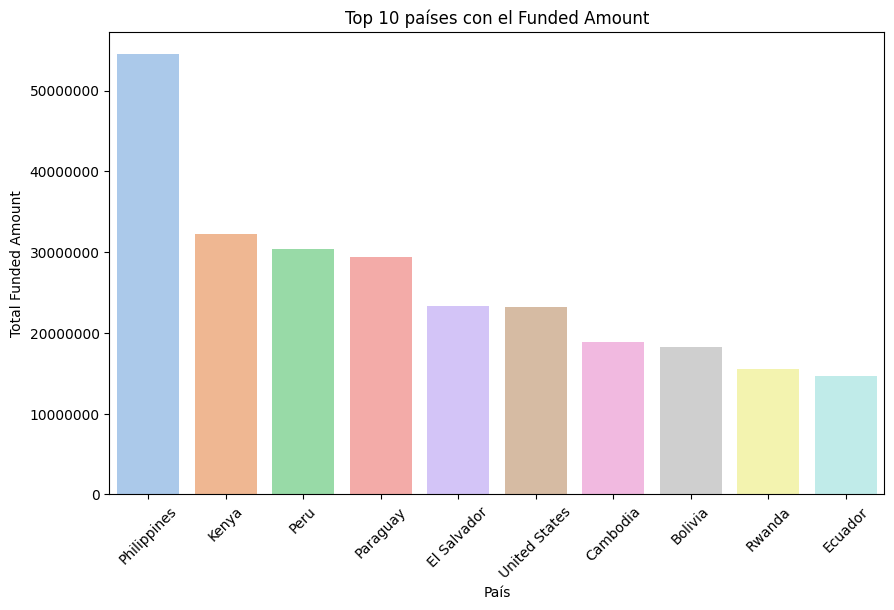

In [ ]:
country_totals = kiva_loands_df.groupby("country")["funded_amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_totals.index, y=country_totals.values, palette="pastel")
plt.title("Top 10 países con el Funded Amount")
plt.xlabel("País")
plt.ylabel("Total Funded Amount")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

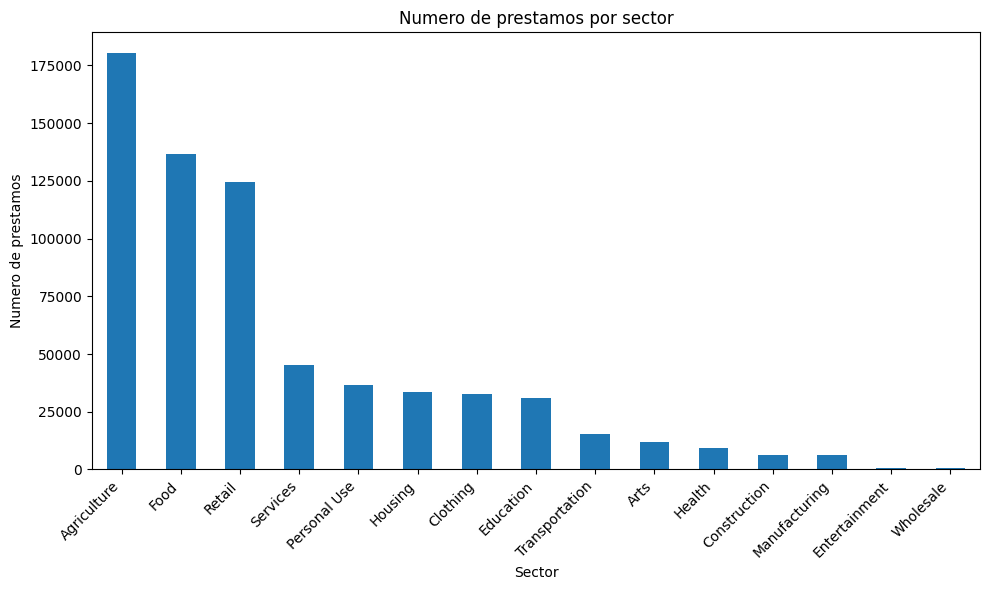

In [ ]:
count_by_sector = kiva_loands_df["sector"].value_counts(). sort_values(ascending=False)

plt.figure(figsize=(10, 6))
count_by_sector.plot(kind="bar",)
plt.title("Numero de prestamos por sector")
plt.xlabel("Sector")
plt.ylabel("Numero de prestamos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show

/tmp/ipython-input-2527226928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="loan_type", y="lender_count", data=agg, palette="viridis")


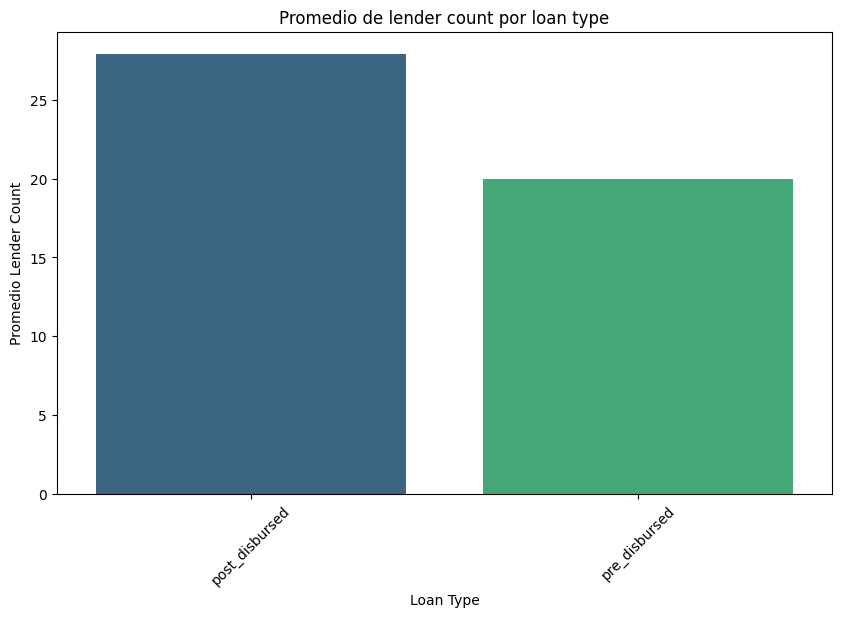

In [ ]:
agg = kiva_loands_df.groupby("loan_type")["lender_count"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="loan_type", y="lender_count", data=agg, palette="viridis")
plt.title("Promedio de lender count por loan type")
plt.xlabel("Loan Type")
plt.ylabel("Promedio Lender Count")
plt.xticks(rotation=45)
plt.show()

# Grafico de barras

/tmp/ipython-input-813664161.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loands_df["month"] = kiva_loands_df["posted_time"].dt.to_period("M")


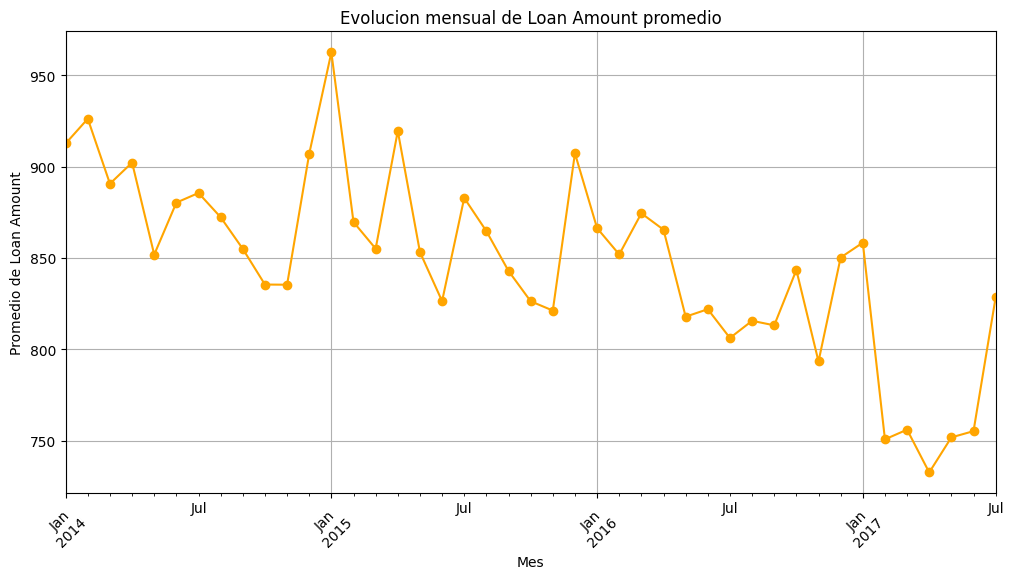

In [ ]:
kiva_loands_df["month"] = kiva_loands_df["posted_time"].dt.to_period("M")
monthly_avg = kiva_loands_df.groupby("month")["loan_amount"].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(marker="o", color="orange")
plt.title("Evolucion mensual de Loan Amount promedio")
plt.xlabel("Mes")
plt.ylabel("Promedio de Loan Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipython-input-3950931868.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kiva_loands_df_line = kiva_loands_df.groupby(pd.Grouper(key="posted_time", freq="M")).agg({"funded_amount": "sum"}).reset_index()


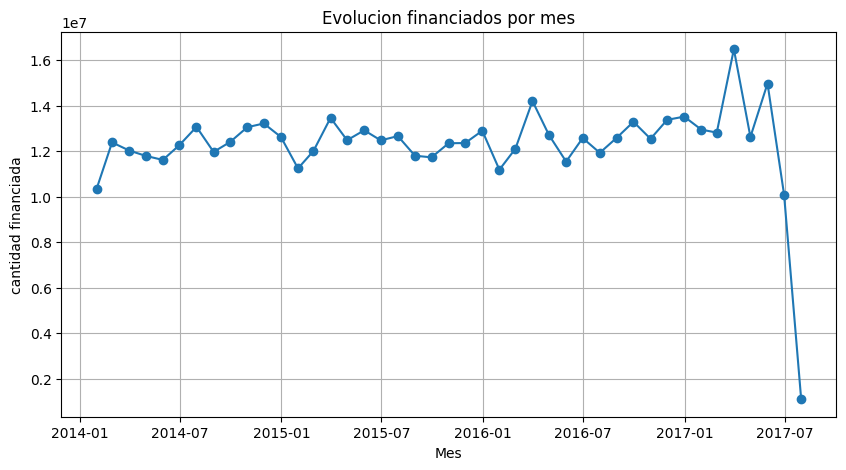

In [ ]:
# Asegurate de que las fechas son datetime

kiva_loands_df["posted_time"] = pd.to_datetime(kiva_loands_df["posted_time"], errors="coerce")
# 1) Grafico de linea temporal
# Por ejemplo, montos financiados por fecha de publicacion (podrias agrupar por dias / meses)
kiva_loands_df_line = kiva_loands_df.groupby(pd.Grouper(key="posted_time", freq="M")).agg({"funded_amount": "sum"}).reset_index()
plt.figure(figsize=(10,5))
plt.plot(kiva_loands_df_line["posted_time"], kiva_loands_df_line["funded_amount"], marker="o")
plt.title("Evolucion financiados por mes")
plt.xlabel("Mes")
plt.ylabel("cantidad financiada")
plt.grid(True)
plt.show()

# Pie Chart

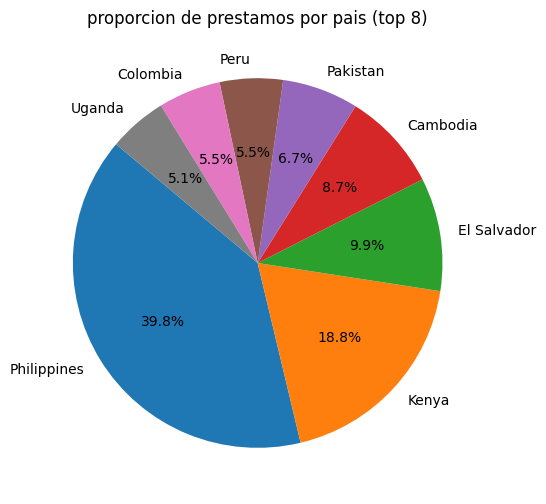

In [ ]:
top_countries = kiva_loands_df["country"].value_counts().nlargest(8)
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct="%1.1f%%", startangle=140)
plt.title("proporcion de prestamos por pais (top 8)")
plt.show()

Choropleth map

In [ ]:
%%capture
!pip install geodatasets

In [ ]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

La extension .shp es la parte principal de un Shapefile, un formato de datos de Geoinformática (GIS) popular que almacena la geometría de elementos geográficos como puntos, líneas y polígonos.

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [ ]:
world["NAME"]

,NAME
0,Fiji
1,Tanzania
2,W. Sahara
3,Canada
4,United States of America
...,...
172,Serbia
173,Montenegro
174,Kosovo
175,Trinidad and Tobago


In [ ]:
kiva_loands_df["country"] = kiva_loands_df["country"].astype(str).str.title().str.strip()
world["NAME"] = world["NAME"].astype(str).str.title().str.strip()

# Verificamos que el formato de world["NAME"] y kiva_loans_df['country'] sea el mismo

In [ ]:
kiva_loands_df["country"]

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [ ]:
country_stats = kiva_loands_df.groupby("country", as_index=False)["loan_amount"].sum()
country_stats = country_stats.rename(columns={"loan_amount": "total_loan"})

print(country_stats.index)
print(country_stats.head())


RangeIndex(start=0, stop=87, step=1)
       country  total_loan
0  Afghanistan     14000.0
1      Albania   2666500.0
2      Armenia  12915400.0
3   Azerbaijan   2888700.0
4       Belize    114025.0


# Hacemos un left join, al dataframe world se le agrega la info del dataframe country_stats cuando coinciden, si hay un país que no existe entonces se marca como NaN

In [ ]:
merged = world.merge(country_stats, left_on="NAME", right_on="country", how="left")


<Figure size 2000x2000 with 0 Axes>

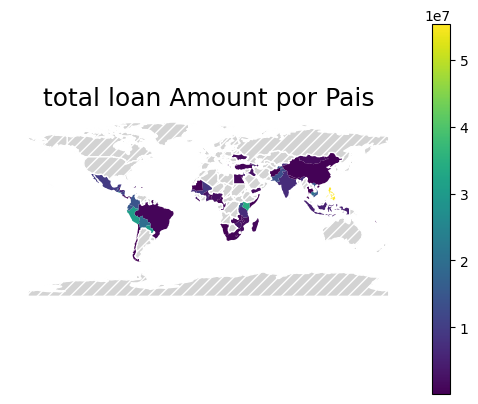

In [ ]:

plt.figure(figsize=(20, 20))
merged.plot(
column="total_loan",
cmap="viridis",
legend=True,
missing_kwds={
    "color": "lightgrey",
    "edgecolor": "white",
    "hatch": "///",
    "label": "No Data"
    }
)

plt.title("total loan Amount por Pais", fontsize=18)
plt.axis("off")
plt.show()

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[20,0], zoom_start=2)

folium.GeoJson(
    merged,
    style_function=lambda feature: {
        "fillColor": "#gray" if feature["properties"]["total_loan"] is None else "#3186cc",
        "color": "#black",
        "weight": 0.5,
        "fillOpacity": 0.6
    },

    tooltip=folium.GeoJsonTooltip(
        fields=["NAME", "total_loan"],
        aliases=["Pais:", "Total Loan:"],
        localize=True,
        sticky=True,
    )
).add_to(m)

m


# Verificamos la existencia de outliers (valores atipicos), respecto a las columnas funded_amount: y loan_amount

## Regla de Tukey: La regla de Tukey es una forma sencilla de detectar valores atipicos(outliers) usando cuartiles. La idea es ver qué tan lejos están los datos de la parte "normal" del conjunto.
Q1= valor donde termina el 25% mas bajo de los datos
Q3 = valor donde termina el 75% de los datos
IQR = Q3 - Q1 --> Mide la zona donde vive la mitad central de los datos
###Un dato se considera outlier si está demasiado lejos de esa zona:
Límite inferior = Q1 -1.5 x IQR
Límite superior = Q3 + 1.5 x IQR
###Todo lo que quede fuera de ese rango se marca como valor atipico.
**Quien fue Tukey?
John Tukey fue un estadistico estadounidense, pionero en analisis y exploración de datos. Es conocido por inventar el boxplot y acuñar el termino bit en informatica

In [ ]:
categories = ["micro", "small", "medium", "large"]

for cat in categories:
  df_cat = kiva_loands_df[kiva_loands_df["loan_amount_category"] == cat]

  if df_cat.empty:
    print(f"\n{cat}: (Sin Datos)")
    continue

  q1 = df_cat["loan_amount"].quantile(0.25)
  q3 = df_cat["loan_amount"].quantile(0.75)
  iqr = q3 - q1

  # Limites para detectar outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  # Filtrar outliers
  outliers = df_cat[(df_cat["loan_amount"] < lower_bound) | (df_cat["loan_amount"] > upper_bound)]
  n_outliers = len(outliers)

  print(f"\nCategoria: {cat}")
  print(f" Q1: {q1}")
  print(f" Q3: {q3}")
  print(f" IQR: {iqr}")
  print(f" Outliers: {n_outliers}")


Categoria: micro
 Q1: 200.0
 Q3: 350.0
 IQR: 150.0
 Outliers: 0

Categoria: small
 Q1: 625.0
 Q3: 1200.0
 IQR: 575.0
 Outliers: 10204

Categoria: medium
 Q1: 3000.0
 Q3: 5000.0
 IQR: 2000.0
 Outliers: 797

Categoria: large
 Q1: 10000.0
 Q3: 10000.0
 IQR: 0.0
 Outliers: 183


# Gráfico de densidad

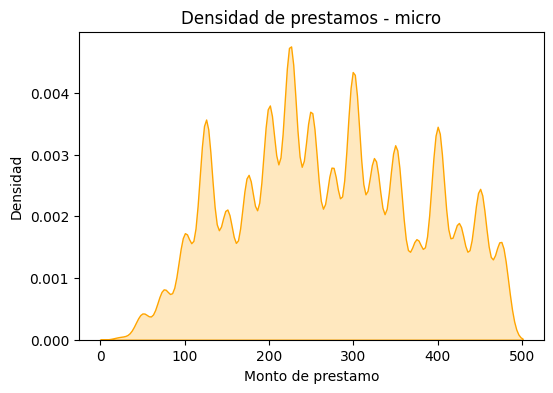

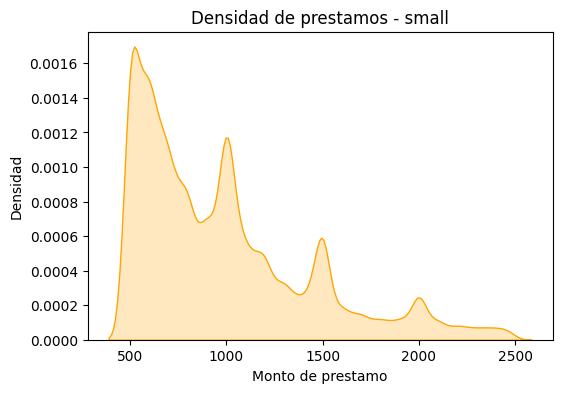

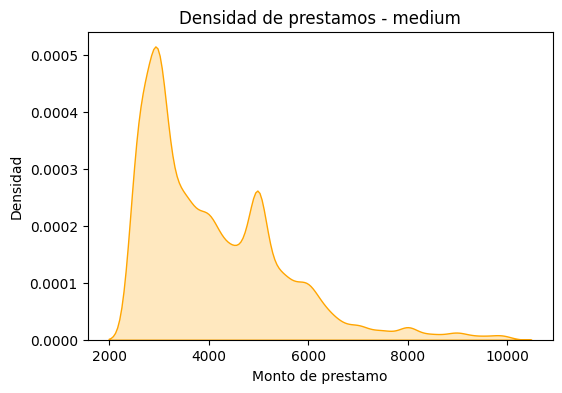

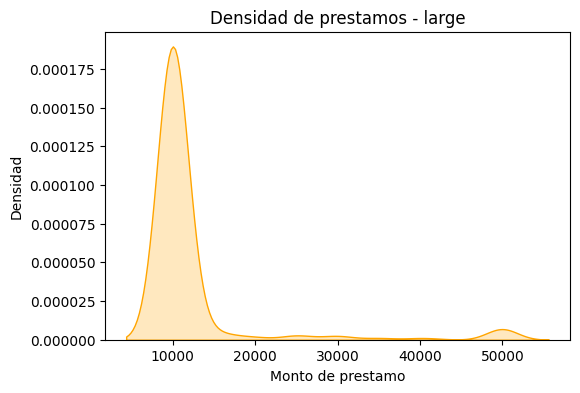

In [ ]:
for cat in labels:
  subset = kiva_loands_df[kiva_loands_df["loan_amount_category"] == cat]
  # If all values are the same, kdeplot is not informative. Use histplot for a single bar.
  plt.figure(figsize=(6,4))
  sns.kdeplot(subset["loan_amount"], fill=True, color="orange")
  plt.title(f"Densidad de prestamos - {cat}")
  plt.xlabel("Monto de prestamo")
  plt.ylabel("Densidad")
  plt.show()

In [ ]:
##folder = "/content/drive/MyDrive/datasets"
##os.makedirs(folder, exist_ok=True)

##kiva_loans_df.to_csv(f"{folder}/df_clean.csv", index=False)

In [ ]:
kiva_loands_df.to_csv("df_clean.csv")

In [ ]:
min_val = kiva_loands_df["loan_amount"].min()
max_val = kiva_loands_df["loan_amount"].max()

#Definir limites fijos (mismos que usaste para categorizar)

bounds = {
    "micro": [min_val, 500],
    "small": [500, 2500],
    "medium": [2500, 10000],
    "large": [10000, max],
}